# DV第11次作业 32019070233 张博强

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from plotnine import *
import seaborn as sns

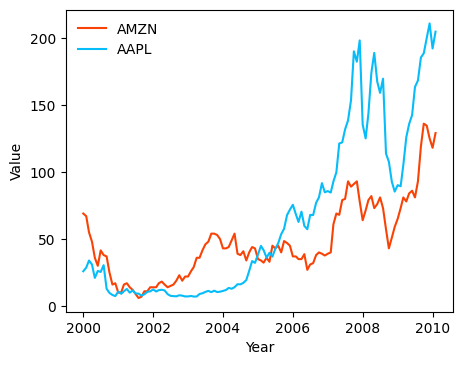

In [4]:
df = pd.read_csv("Line_Data.csv")
df.date=[datetime.strptime(str(d),'%Y/%m/%d').date() for d in df.date]
fig =plt.figure(figsize=(5,4),dpi=100)
plt.plot(df.date,df.AMZN,color='#F94306',label='AMZN')
plt.plot(df.date,df.AAPL,color='#06BCF9',label='AAPL')
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc='upper left',edgecolor='none',facecolor='none')
plt.show()

d:\Dev\Env\Python310\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


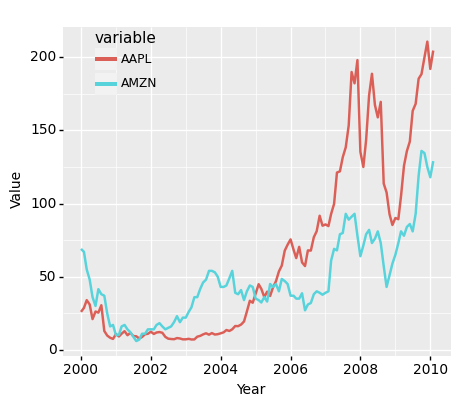

In [5]:
df = pd.read_csv("Line_Data.csv")
df['date'] = [datetime.strptime(d, '%Y/%m/%d').date() for d in df['date']]
melt_df = pd.melt(df, id_vars=["date"],
                  var_name='variable', value_name='value')
base_plot = (ggplot(melt_df, aes(x='date', y='value', group='variable', color='variable'))
             + geom_line(size=1)
             + scale_x_date(date_labels="%Y", date_breaks="2 year")
             + scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl')
             + xlab("Year")
             + ylab("Value")
             + theme(axis_title=element_text(size=10, face="plain", color="black"), axis_text=element_text(size=10, face="plain", color="black"), legend_position=(0.25, 0.8),
                     legend_background=element_blank(),
                     aspect_ratio=0.85,
                     figure_size=(5, 5),
                     dpi=100
                     ))
print(base_plot)

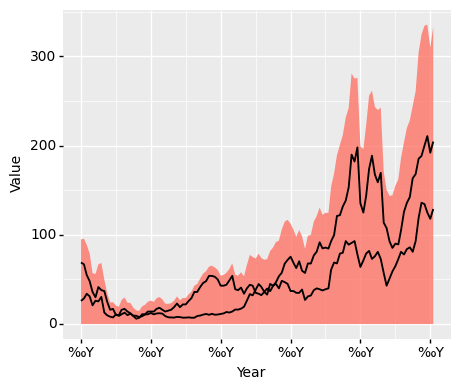

In [17]:

base_plot = (ggplot(melt_df,aes(x='date',y='value',group='variable'))
             + geom_area(fill="#FF6B5E", alpha=0.75, color='none')
             + geom_line(color="black", size=0.75)
             + scale_x_date(date_labels="‰Y", date_breaks="2 year")
             + xlab("Year")
             + ylab("Value")
             + theme(axis_title=element_text(size=10, face="plain", color="black"), axis_text=element_text(size=10, face="plain", color="black"), aspect_ratio=0.85, figure_size=(5, 5), dpi=100)
             )
print(base_plot)

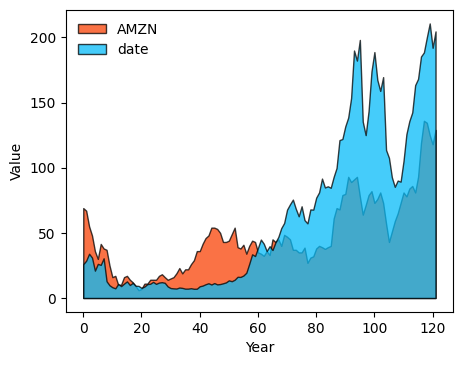

In [10]:
columns = df.columns
colors = ["#F94306", "#06BCF9"]
fig = plt.figure(figsize=(5, 4), dpi=100)
plt.fill_between(df.index.values, y1=df.AMZN.values, y2=0,
                 label=columns[1], alpha=0.75, facecolor=colors[0], linewidth=1, edgecolor='k')
plt.fill_between(df.index.values, y1=df.AAPL.values, y2=0,
                 label=columns[0], alpha=0.75, facecolor=colors[1], linewidth=1, edgecolor='k')
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc='upper left', edgecolor='none', facecolor='none')
plt.show()

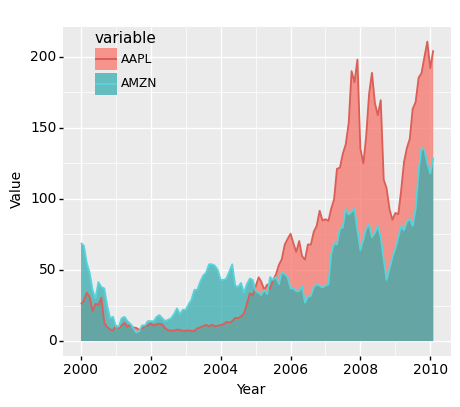

In [18]:
base_plot=(ggplot(melt_df,aes(x='date',y='value',group='variable'))
+geom_area(aes(fill='variable'),alpha=0.75,position="identity")
+geom_line(aes(color='variable'),size=0.75)
+scale_x_date(date_labels ="%Y",date_breaks="2 year")
+scale_fill_hue(s=0.90,l=0.65,h=0.0417,color_space='husl')
+xlab("Year")
+ylab("Value")
+theme(axis_title=element_text(size=10,face="plain",color="black"),
axis_text = element_text(size=10,face="plain",color="black"),
legend_position =(0.25,0.8),
legend_background=element_blank(),
aspect_ratio =0.85,
figure_size =(5,5),
dpi=100))
print(base_plot)

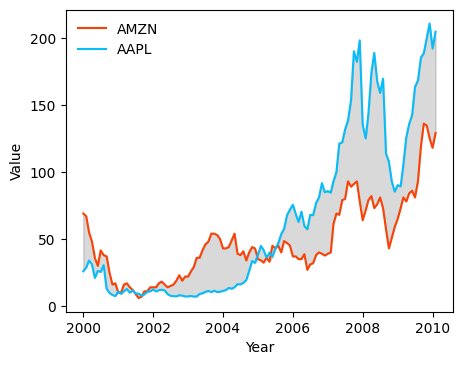

In [19]:
df['ymin']=df[['AMZN','AAPL']].apply(lambda x:x.min(),axis=1)
df['ymax']=df[['AMZN','AAPL']].apply(lambda x:x.max(),axis=1)
fig =plt.figure(figsize=(5,4),dpi=100)
plt.fill_between(df.date.values,y1=df.ymax.values,y2=df.ymin.values,alpha=0.15,facecolor='black',linewidth=1,edgecolor ='k')
plt.plot(df.date,df.AMZN,color='#F94306',label='AMZN')
plt.plot(df.date,df.AAPL,color='#06BCF9',label='AAPL')
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc='upper left',edgecolor='none',facecolor='none')
plt.show()

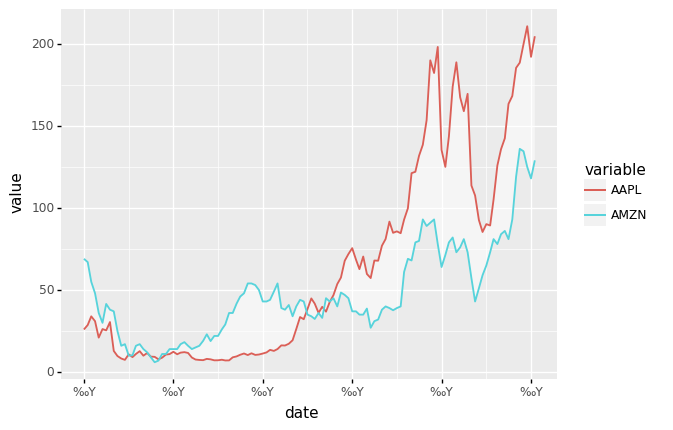

In [21]:
melt_df = pd.melt(df[['date', 'AMZN', 'AAPL']], id_vars=[
                  "date"], var_name='variable', value_name='value')
base_plot = (ggplot()
             + geom_ribbon(aes(x='date', ymin='ymin', ymax='ymax',
                           group=1), df, alpha=0.5, fill="white", color="none")
             + geom_line(aes(x='date', y='value', color='variable',
                         group='variable'), melt_df, size=0.75)
             + scale_x_date(date_labels="‰Y", date_breaks="2 year"))
print(base_plot)


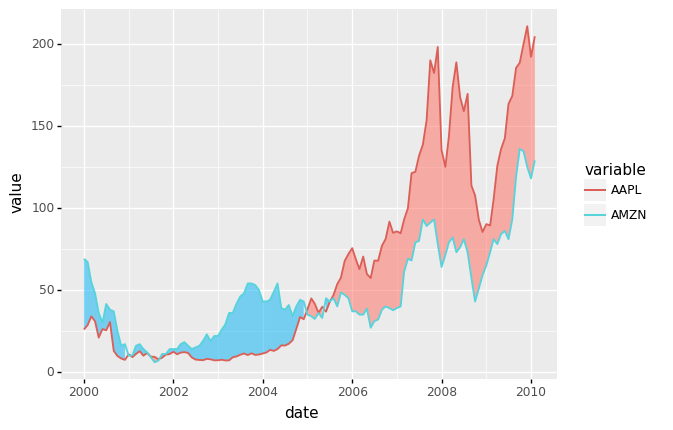

In [26]:
import numpy as np
df['ymin1']=df['ymin']
df.loc[(df['AAPL']-df['AMZN'])>0,'ymin1']=np.nan
df['ymin2']=df['ymin']
df.loc[(df['AAPL']-df['AMZN'])<=0,'ymin2']=np.nan
df['ymax1']=df['ymax']
df.loc[(df['AAPL']-df['AMZN'])>0,'ymax1']=np.nan
df['ymax2']=df['ymax']
df.loc[(df['AAPL']-df['AMZN'])<=0,'ymax2']=np.nan
base_plot=(ggplot()
+geom_ribbon(aes(x='date',ymin='ymin1',ymax='ymax1',group=1),df,alpha=0.5,fill="#00B2F6",color="none")
+geom_ribbon(aes(x='date',ymin='ymin2',ymax='ymax2',group=1),df,alpha=0.5,fill="#FF6B5E",color="none")
+geom_line(aes(x ='date',y='value',color='variable',group='variable'),melt_df,size=0.75)
+scale_x_date(date_labels ="%Y",date_breaks ="2 year"))
print(base_plot)

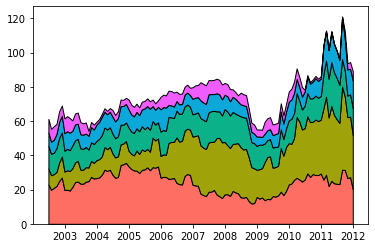

In [28]:
df=pd.read_csv('StackedArea_Data.csv',index_col =0)
df.index=[datetime.strptime(d,'%Y/%m/%d').date() for d in df.index]
Sum_df=df.apply(lambda x:x.sum(),axis=0).sort_values(ascending=False)
df=df[Sum_df.index]
columns=df.columns
colors=sns.husl_palette(len(columns),h=15/360,l=0.65,s=1).as_hex()
plt.stackplot(df.index.values,df.values.T,alpha=1,labels=columns,linewidth=1,edgecolor ='k',colors=colors)

C:\Users\brokyz\AppData\Local\Temp\ipykernel_2964\1074346012.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator


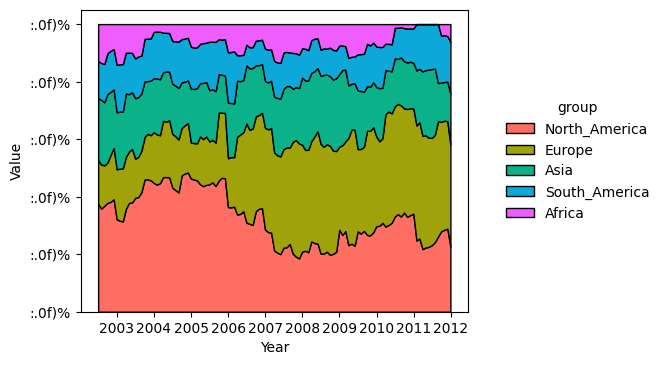

In [30]:
df=pd.read_csv('StackedArea_Data.csv',index_col =0)
df.index=[datetime.strptime(d,'%Y/%m/%d').date() for d in df.index]
SumRow_df=df.apply(lambda x:x.sum(),axis=1)
df=df.apply(lambda x:x/SumRow_df,axis=0)
meanCol_df=df.apply(lambda x:x.mean(),axis=0).sort_values(ascending=False)
df=df[meanCol_df.index]
columns=df.columns
colors=sns.husl_palette(len(columns),h=15/360,l=0.65,s=1).as_hex()
fig =plt.figure(figsize=(5,4),dpi=100)
plt.stackplot(df.index.values,df.values.T,labels=columns,colors=colors,linewidth=1,edgecolor ='k')
plt.xlabel("Year")
plt.ylabel("Value")
plt.gca().set_yticklabels([':.0f)%'.format(x*100)for x in plt.gca().get_yticks()])
plt.legend(title="group",loc="center right",bbox_to_anchor=(1.5,0,0,1),edgecolor='none',facecolor='none')

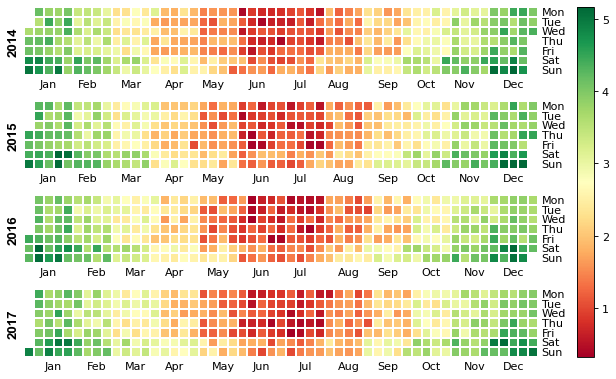

In [33]:
import calmap
df=pd.read_csv('Calendar.csv',parse_dates=['date'])
df.set_index('date',inplace=True)
fig,ax=calmap.calendarplot(df['value'],fillcolor='grey',linecolor='w',linewidth=0.1,cmap='RdYlGn',yearlabel_kws={'color':'black','fontsize':'12'},fig_kws=dict(figsize=(10,5),dpi=80))
fig.colorbar(ax[0].get_children()[1],ax=ax.ravel().tolist())

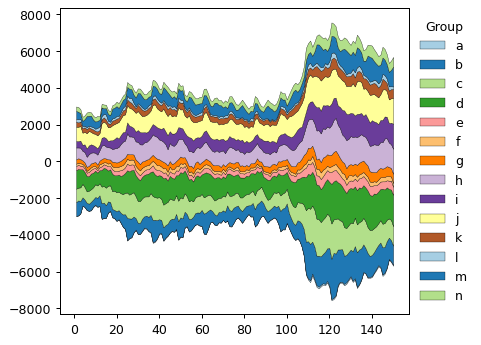

In [40]:
from matplotlib import colors
df = pd.read_csv('StreamGraph_Data.csv', index_col=0)
labels = df.columns
cmap = plt.get_cmap('Paired', 11)
color = [colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
fig = plt.figure(figsize=(5, 4.5), dpi=90)
plt.stackplot(df.index.values, df.values.T, labels=labels,
              baseline='sym', colors=color, edgecolor='k', linewidth=0.25)
plt.legend(loc="center right", bbox_to_anchor=(1.2, 0, 0, 1),
           title='Group', edgecolor='none', facecolor='none')
plt.show()


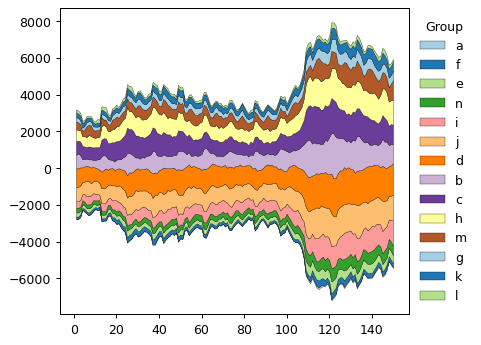

In [42]:
df=pd.read_csv('StreamGraph_Data.csv',index_col =0)
df_colmax=(df.apply(lambda x:x.max(),axis=0)).sort_values(ascending=True)
N=len(df_colmax)
index=np.append(np.arange(0,N,2),np.arange(1,N,2)[::-1])
labels=df_colmax.index[index]
df=df[labels]
cmap=plt.get_cmap('Paired',11)
color=[colors.rgb2hex(cmap(i)[:3])for i in range(cmap.N)]
fig=plt.figure(figsize=(5,4.5),dpi =90)
plt.stackplot(df.index.values,df.values.T,labels=labels,baseline='wiggle',colors=color,edgecolor='k',linewidth=0.25)
plt.legend(loc="center right",bbox_to_anchor=(1.2,0,0,1),title='Group',edgecolor='none',facecolor='none')
plt.show()